In [1]:
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import GEOparse
import os
from math import ceil
import logging
import pandas as pd
from IPython.display import display
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
import pandas as pd

In [3]:
full_data = pd.read_csv("/Users/user/Desktop/breast_cancer_fr/data/processed_data.csv")
cat = pd.read_csv("/Users/user/Desktop/breast_cancer_fr/data/data_categorical_plots.csv")
display(full_data.head())
display(cat.head())

,size_dissected_area,percentage_tumor_cells,cell_number_dissected,inflammatory_cells_pct,invasive_tumor_area_size1_mm,invasive_tumor_area_size2_mm,invasive_tumor_cells_pct,invasive_tumor_grade,necrotic_cells_pct,normal_epithelial_cells_pct,...,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,race_Caucasian,race_Oriental,arm_HER2+_CT_H,arm_HER2-_CT
0,40.0,70,22400,10,4.0,10.0,70,3,0,0,...,2.813851,1.631844,1.555370,1.291948,1.621068,1.704353,True,False,False,False
1,4.0,60,1500,10,2.0,7.0,80,2,0,0,...,3.171749,1.878034,1.457797,1.532488,1.845472,2.110035,True,False,False,False
2,19.0,45,5130,10,6.0,10.0,60,2,10,0,...,2.765988,1.736611,1.490477,1.597638,1.692226,1.959056,True,False,True,False
3,40.0,90,28800,5,10.0,4.0,90,2,0,0,...,2.705988,1.396333,1.340778,1.385656,1.585541,1.924786,True,False,False,False
4,40.0,90,28800,5,4.0,10.0,90,2,0,0,...,2.862050,1.704060,1.684241,1.368954,1.808343,1.741660,True,False,True,False


,size_dissected_area,percentage_tumor_cells,cell_number_dissected,inflammatory_cells [%],invasive_tumor_area_size1 [mm],invasive_tumor_area_size2 [mm],invasive_tumor_cells [%],invasive_tumor_grade,necrotic_cells [%],normal_epithelial_cells [%],...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,40.0,70,22400,10,4.0,10.0,70,3,0,0,...,1.617069,1.552830,1.984722,1.771254,2.813851,1.631844,1.555370,1.291948,1.621068,1.704353
1,4.0,60,1500,10,2.0,7.0,80,2,0,0,...,1.763601,1.728114,1.875366,2.290922,3.171749,1.878034,1.457797,1.532488,1.845472,2.110035
2,19.0,45,5130,10,6.0,10.0,60,2,10,0,...,1.754134,1.486587,1.752249,2.392434,2.765988,1.736611,1.490477,1.597638,1.692226,1.959056
3,40.0,90,28800,5,10.0,4.0,90,2,0,0,...,1.687064,1.283018,1.701278,1.899290,2.705988,1.396333,1.340778,1.385656,1.585541,1.924786
4,40.0,90,28800,5,4.0,10.0,90,2,0,0,...,1.806560,1.376001,2.109005,1.785332,2.862050,1.704060,1.684241,1.368954,1.808343,1.741660


# Exploración:

# Variables clínicas

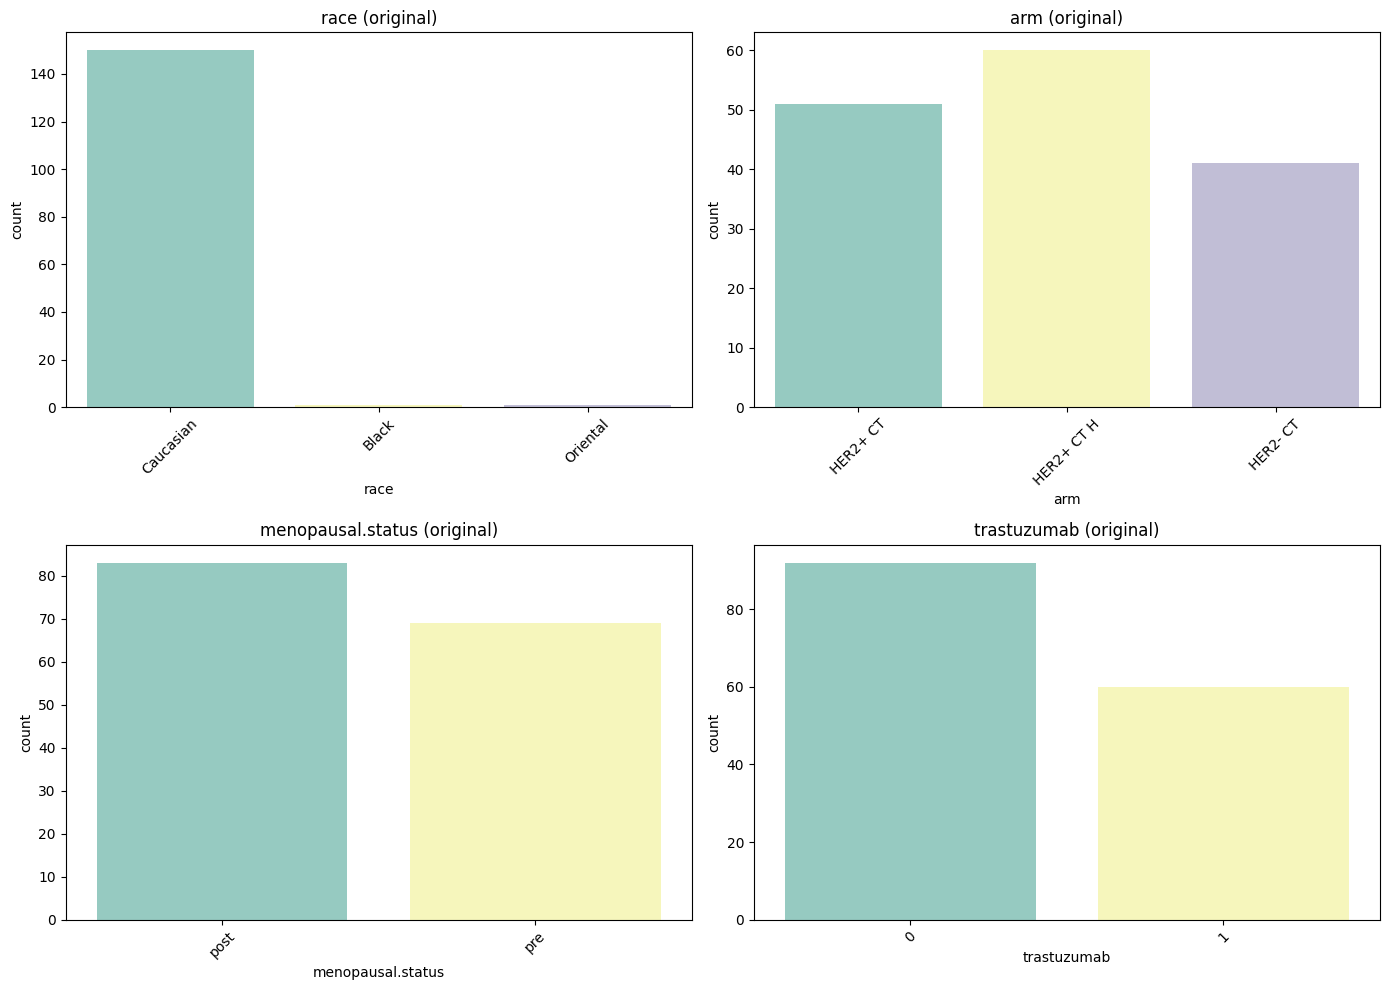

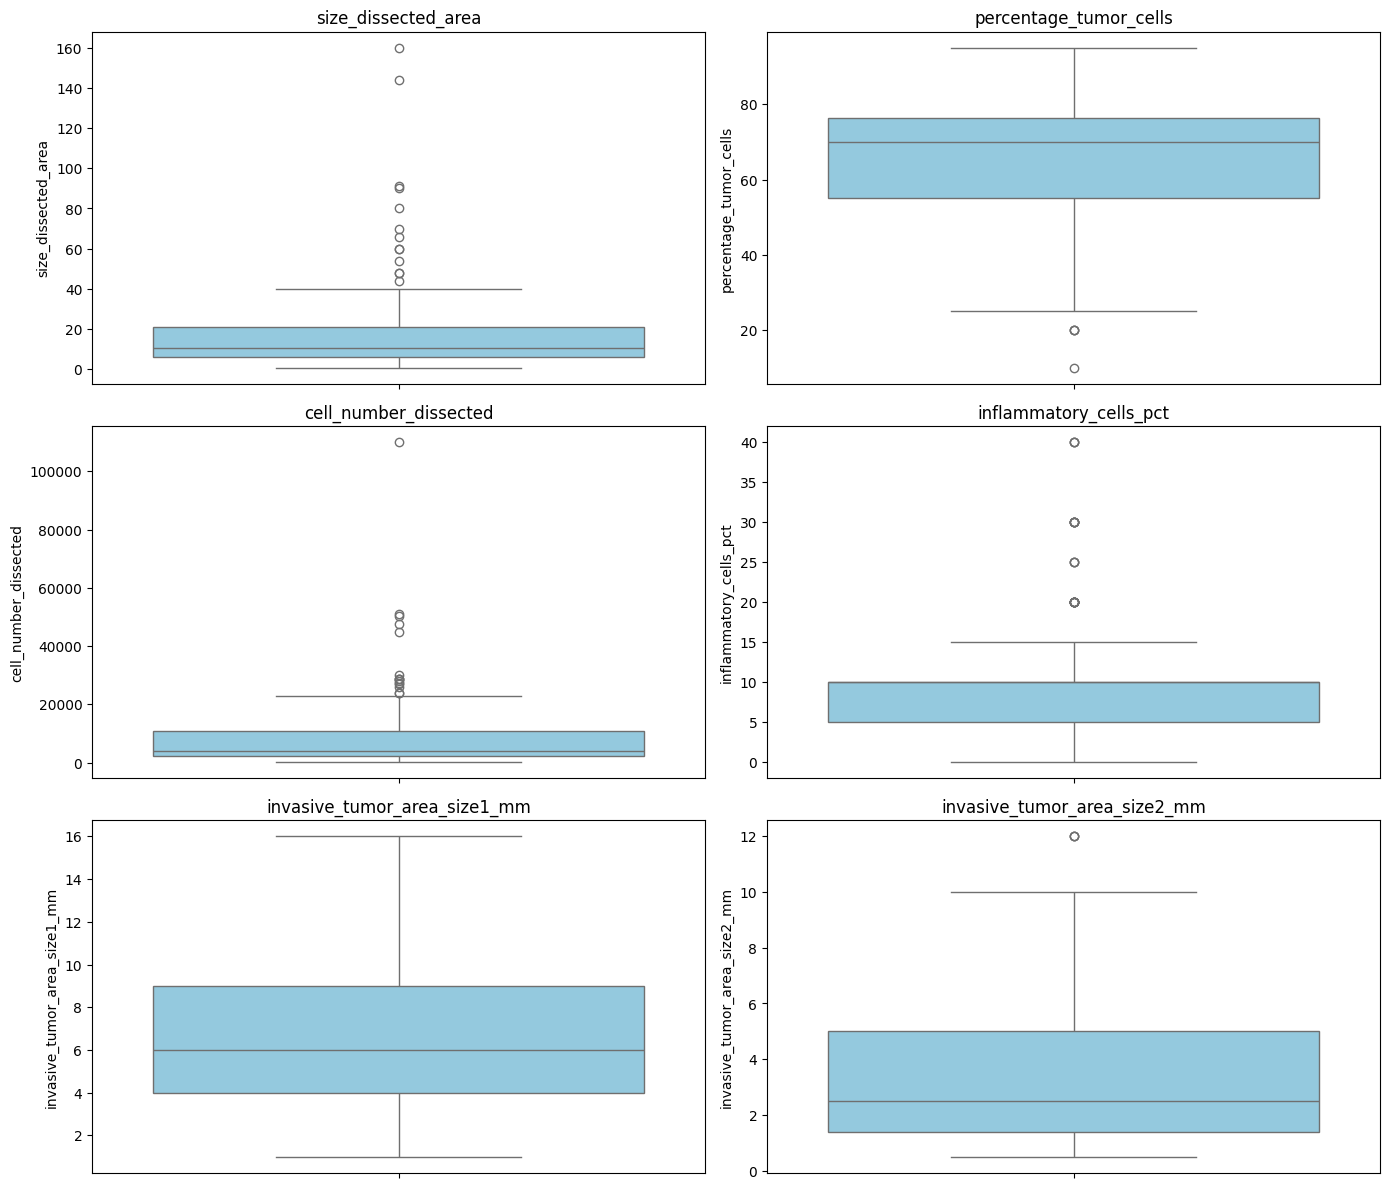

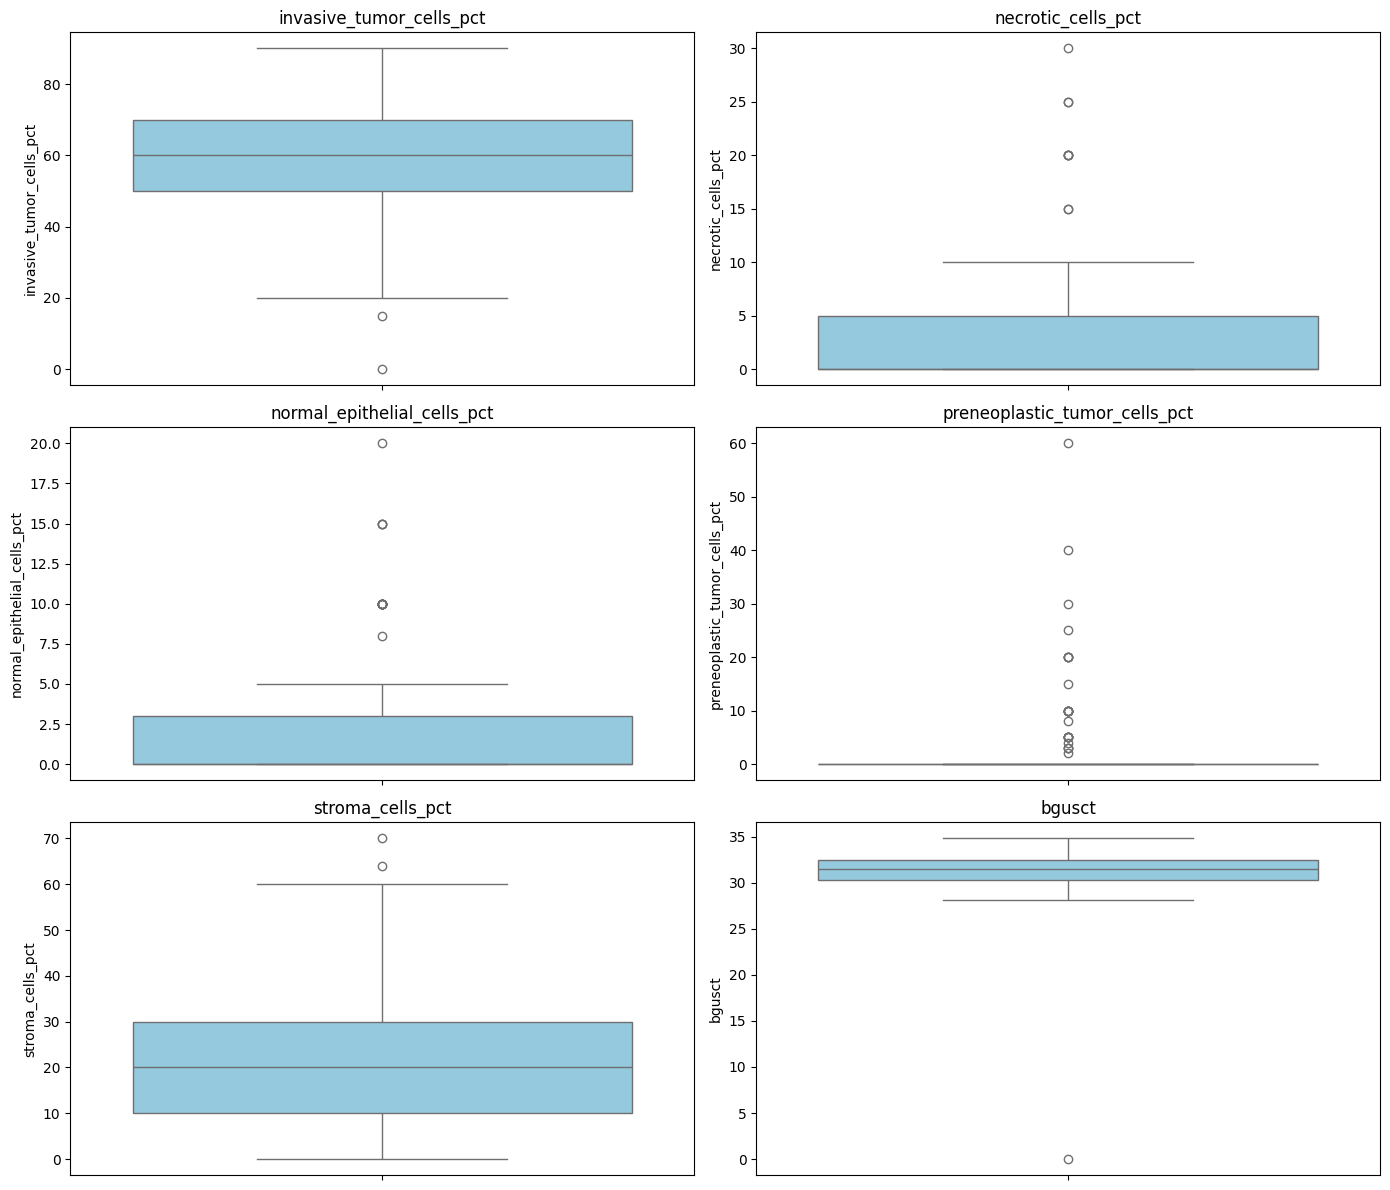

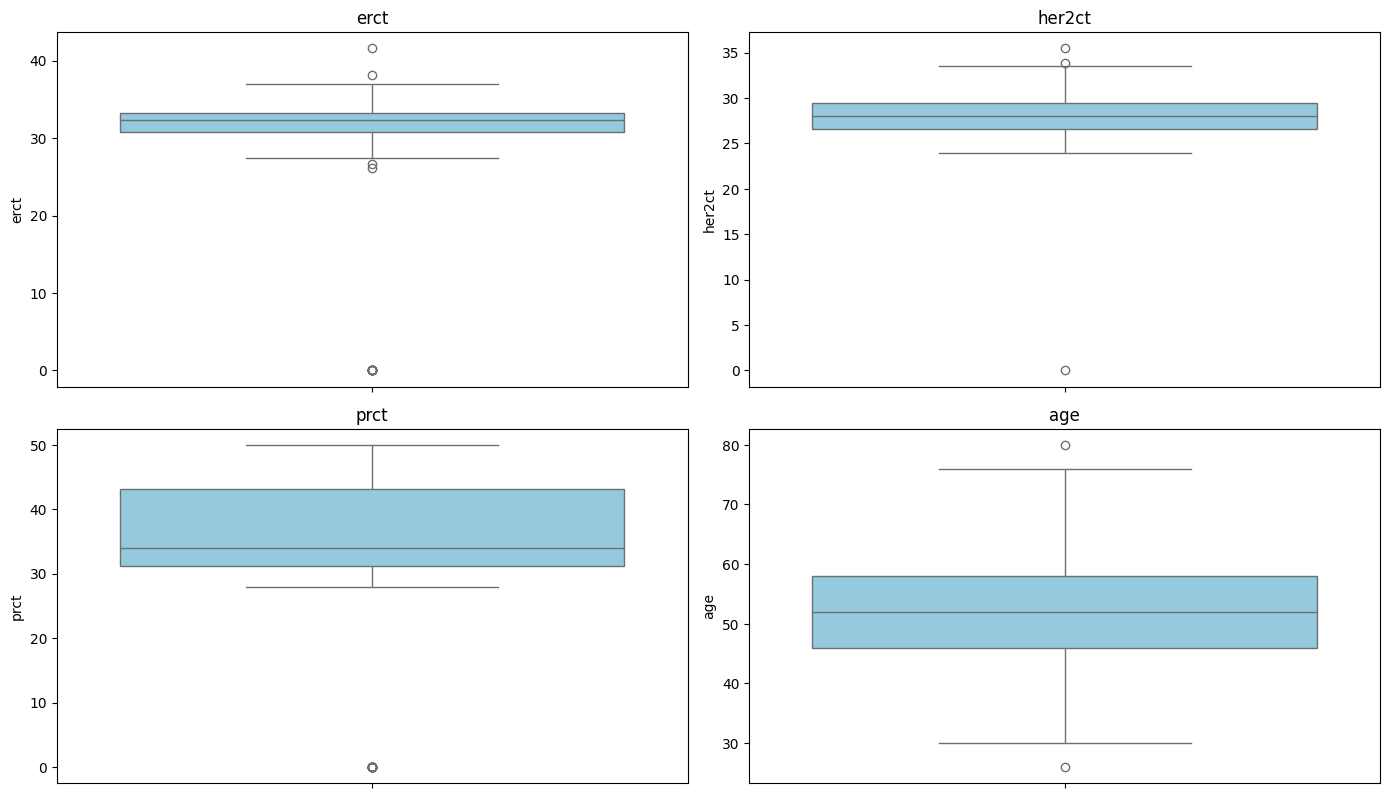

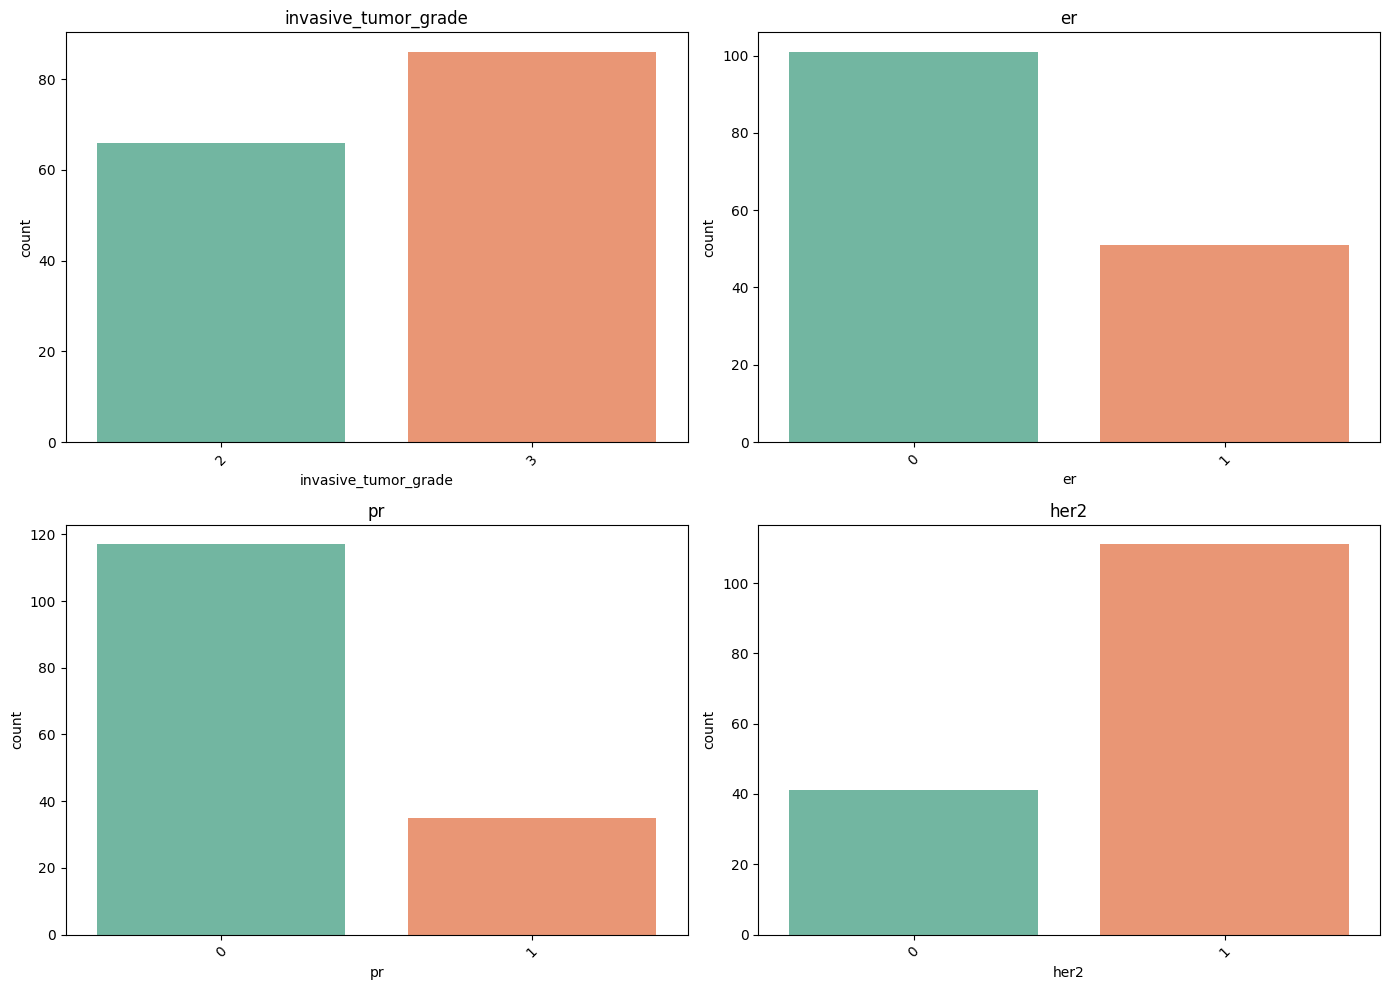

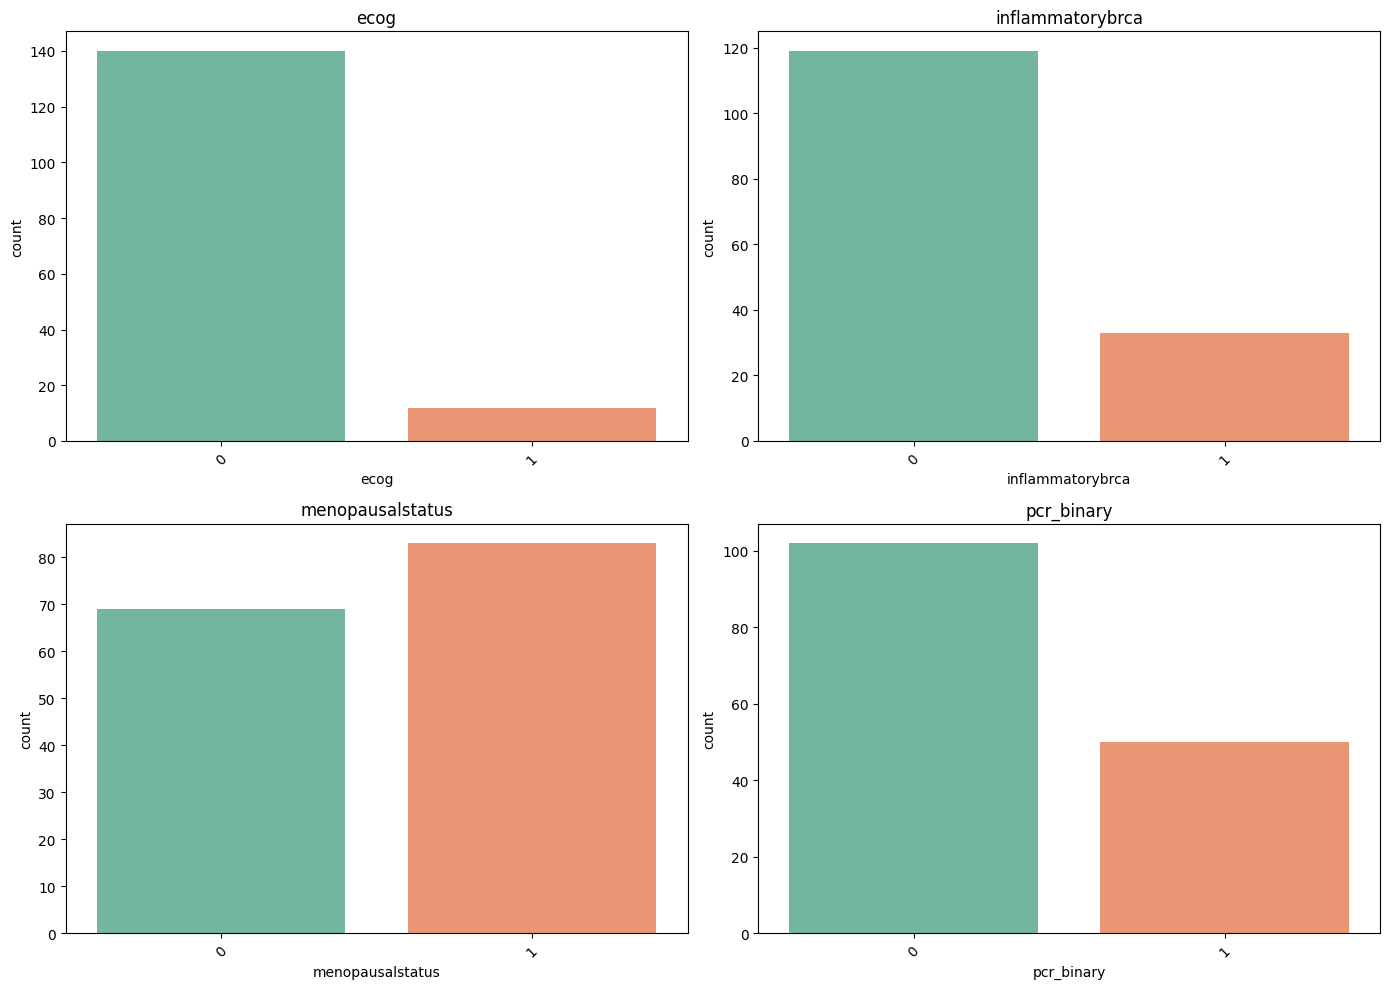

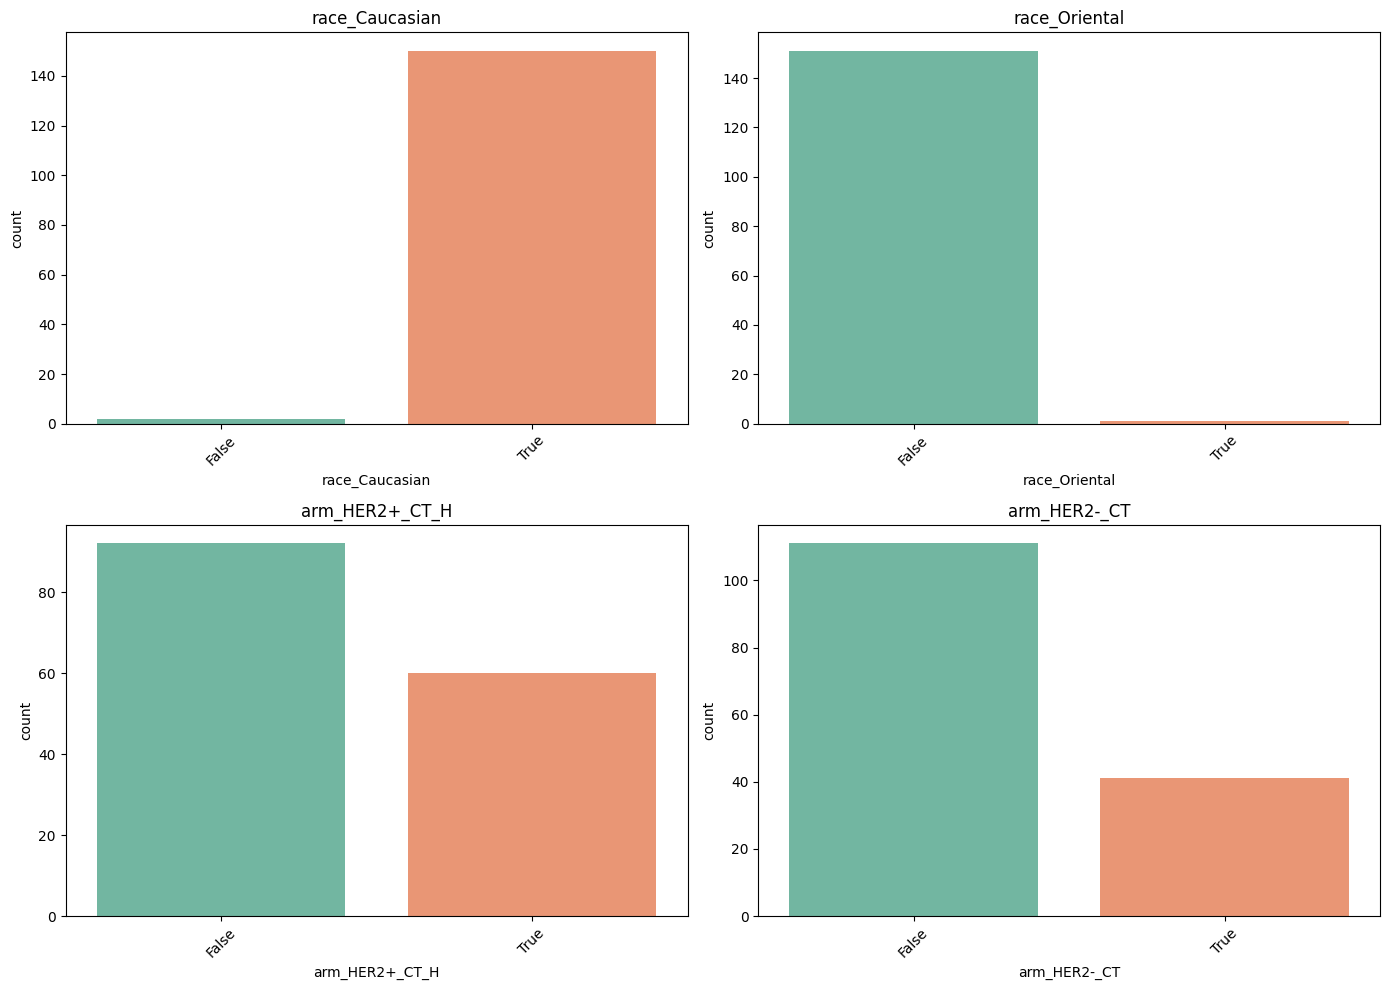

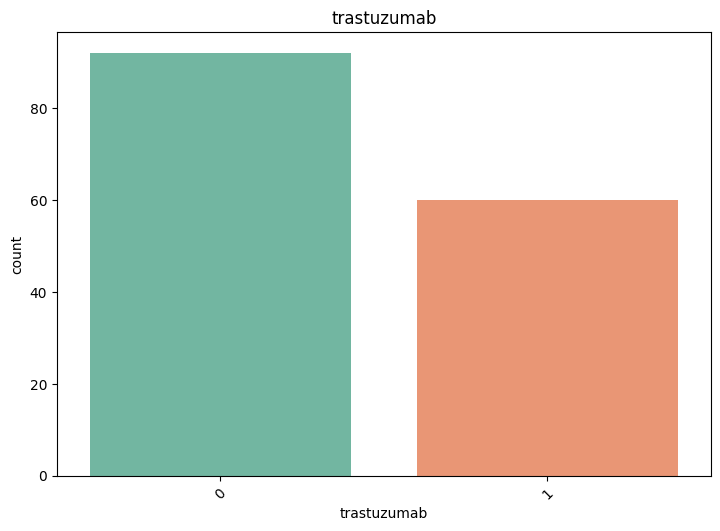

In [ ]:
output_dir = "/Users/user/Desktop/breast_cancer_fr/plots"
os.makedirs(output_dir, exist_ok=True)


# leer el dataset original para categóricas sin tratar
cat_data = pd.read_csv("/Users/user/Desktop/breast_cancer_fr/data/data_categorical_plots.csv")

# codificar trastuzumab
if "treatment" in cat_data.columns:
    cat_data["trastuzumab"] = cat_data["treatment"].str.contains("trastuzumab", case=False, na=False).astype(int)
    cat_data.drop(columns="treatment", inplace=True)

# seleccionar solo las categóricas antes del tratamiento 
cat_cols_orig = ["race", "arm", "menopausal.status", "trastuzumab"]
cat_data_subset = cat_data[cat_cols_orig].copy()

# countplots para categóricas originales
plots_per_fig = 4
n_figs = ceil(len(cat_cols_orig) / plots_per_fig)

for i in range(n_figs):
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
    axs = axs.flatten()
    subset = cat_cols_orig[i * plots_per_fig:(i + 1) * plots_per_fig]

    for j, col in enumerate(subset):
        sns.countplot(data=cat_data_subset, x=col, hue=col, ax=axs[j], legend=False, palette="Set3")
        axs[j].set_title(f"{col} (original)")
        axs[j].tick_params(axis='x', rotation=45)

    for k in range(j + 1, len(axs)):
        fig.delaxes(axs[k])

    fig.tight_layout()
    fig.savefig(os.path.join(output_dir, f"countplots_categoricas_crudo_{i+1}.png"), dpi=300)
    plt.show()
    plt.close(fig)

# leer dataset procesado 
full_data = pd.read_csv("/Users/user/Desktop/breast_cancer_fr/data/processed_data.csv")

# eliminar columnas no deseadas y codificar trastuzumab si es necesario
if "treatment" in full_data.columns:
    full_data["trastuzumab"] = full_data["treatment"].str.contains("trastuzumab", case=False, na=False).astype(int)
    full_data.drop(columns="treatment", inplace=True)

# seleccionar columnas clínicas
columnas_clinicas = [
    'size_dissected_area', 'percentage_tumor_cells', 'cell_number_dissected',
    'inflammatory_cells_pct', 'invasive_tumor_area_size1_mm', 'invasive_tumor_area_size2_mm',
    'invasive_tumor_cells_pct', 'invasive_tumor_grade', 'necrotic_cells_pct',
    'normal_epithelial_cells_pct', 'preneoplastic_tumor_cells_pct', 'stroma_cells_pct',
    'bgusct', 'erct', 'her2ct', 'prct', 'er', 'pr', 'her2', 'age', 'ecog',
    'inflammatorybrca', 'menopausalstatus', 'pcr_binary',
    'race_Caucasian', 'race_Oriental', 'arm_HER2+_CT_H', 'arm_HER2-_CT', 'trastuzumab'
]

exploracion_df = full_data[columnas_clinicas].copy()

#clasificar variables
cat_cols = []
num_cols = []

for col in exploracion_df.columns:
    unique_vals = exploracion_df[col].nunique()
    if pd.api.types.is_numeric_dtype(exploracion_df[col]):
        if unique_vals <= 5:
            cat_cols.append(col)
        else:
            num_cols.append(col)
    else:
        cat_cols.append(col)

# boxplots para numéricas
plots_per_fig = 6
n_figs = ceil(len(num_cols) / plots_per_fig)

for i in range(n_figs):
    fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))
    axs = axs.flatten()
    subset = num_cols[i * plots_per_fig:(i + 1) * plots_per_fig]

    for j, col in enumerate(subset):
        sns.boxplot(data=exploracion_df, y=col, ax=axs[j], color="skyblue")
        axs[j].set_title(col)

    for k in range(j + 1, len(axs)):
        fig.delaxes(axs[k])

    fig.tight_layout()
    fig.savefig(os.path.join(output_dir, f"boxplots_numericas_grupo_{i+1}.png"), dpi=300)
    plt.show()
    plt.close(fig)

# countplots para categóricas ya tratadas
plots_per_fig = 4
n_figs = ceil(len(cat_cols) / plots_per_fig)

for i in range(n_figs):
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
    axs = axs.flatten()
    subset = cat_cols[i * plots_per_fig:(i + 1) * plots_per_fig]

    for j, col in enumerate(subset):
        sns.countplot(data=exploracion_df, x=col, hue=col, legend=False, ax=axs[j], palette="Set2")
        axs[j].set_title(col)
        axs[j].tick_params(axis='x', rotation=45)

    for k in range(j + 1, len(axs)):
        fig.delaxes(axs[k])

    fig.tight_layout()
    fig.savefig(os.path.join(output_dir, f"countplots_categoricas_grupo_{i+1}.png"), dpi=300)
    plt.show()
    plt.close(fig)

# Matriz de correlación:

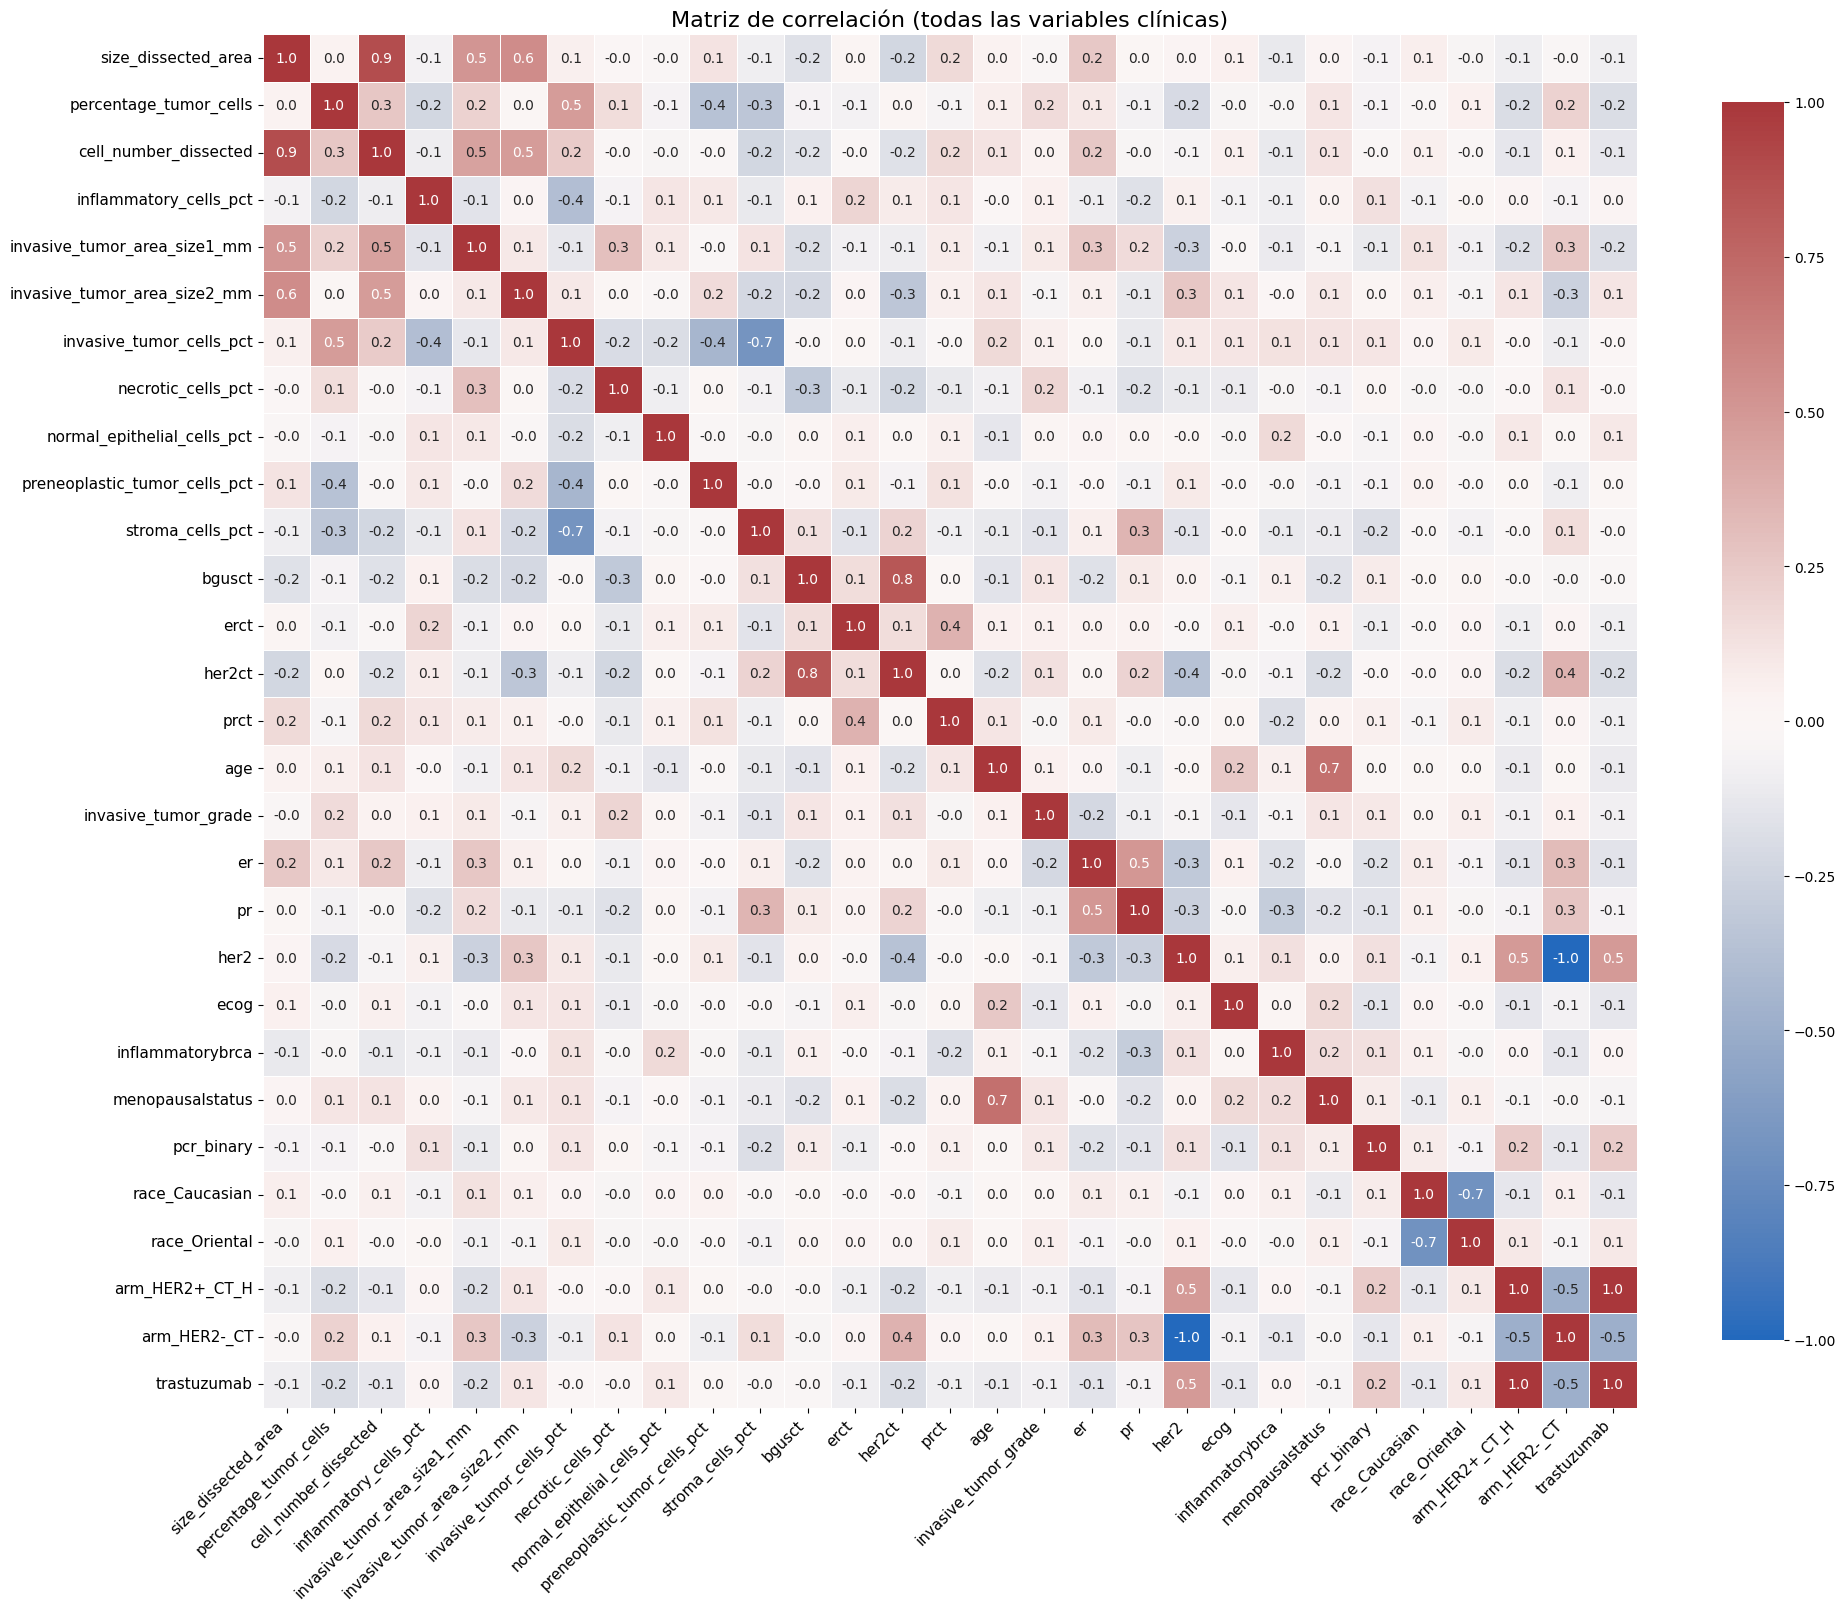

In [ ]:
# matriz de correlación (Pearson) completa para variables clínicas

# unir variables clínicas categóricas + continuas
corr_vars = num_cols + cat_cols
corr_df = exploracion_df[corr_vars].copy()

# calcular matriz de correlación directamente (sin cambiar tipos)
corr_matrix = corr_df.corr(method="pearson").round(2)

# heatmap
num_vars = len(corr_matrix.columns)
plt.figure(figsize=(max(20, 0.6 * num_vars), max(18, 0.6 * num_vars)))  # tamaño más amplio

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".1f", 
    cmap="vlag",
    center=0,
    linewidths=0.5,
    square=True,
    annot_kws={"size": 10}, 
    cbar_kws={"shrink": 0.75}
)

plt.xticks(rotation=45, ha="right", fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.title("Matriz de correlación (todas las variables clínicas)", fontsize=16)
plt.tight_layout()

# guardar imagen
correlation_path = os.path.join(output_dir, "matriz_correlacion_clinicas.png")
plt.savefig(correlation_path, dpi=300)
plt.show()
plt.close()


# top 30 correlaciones

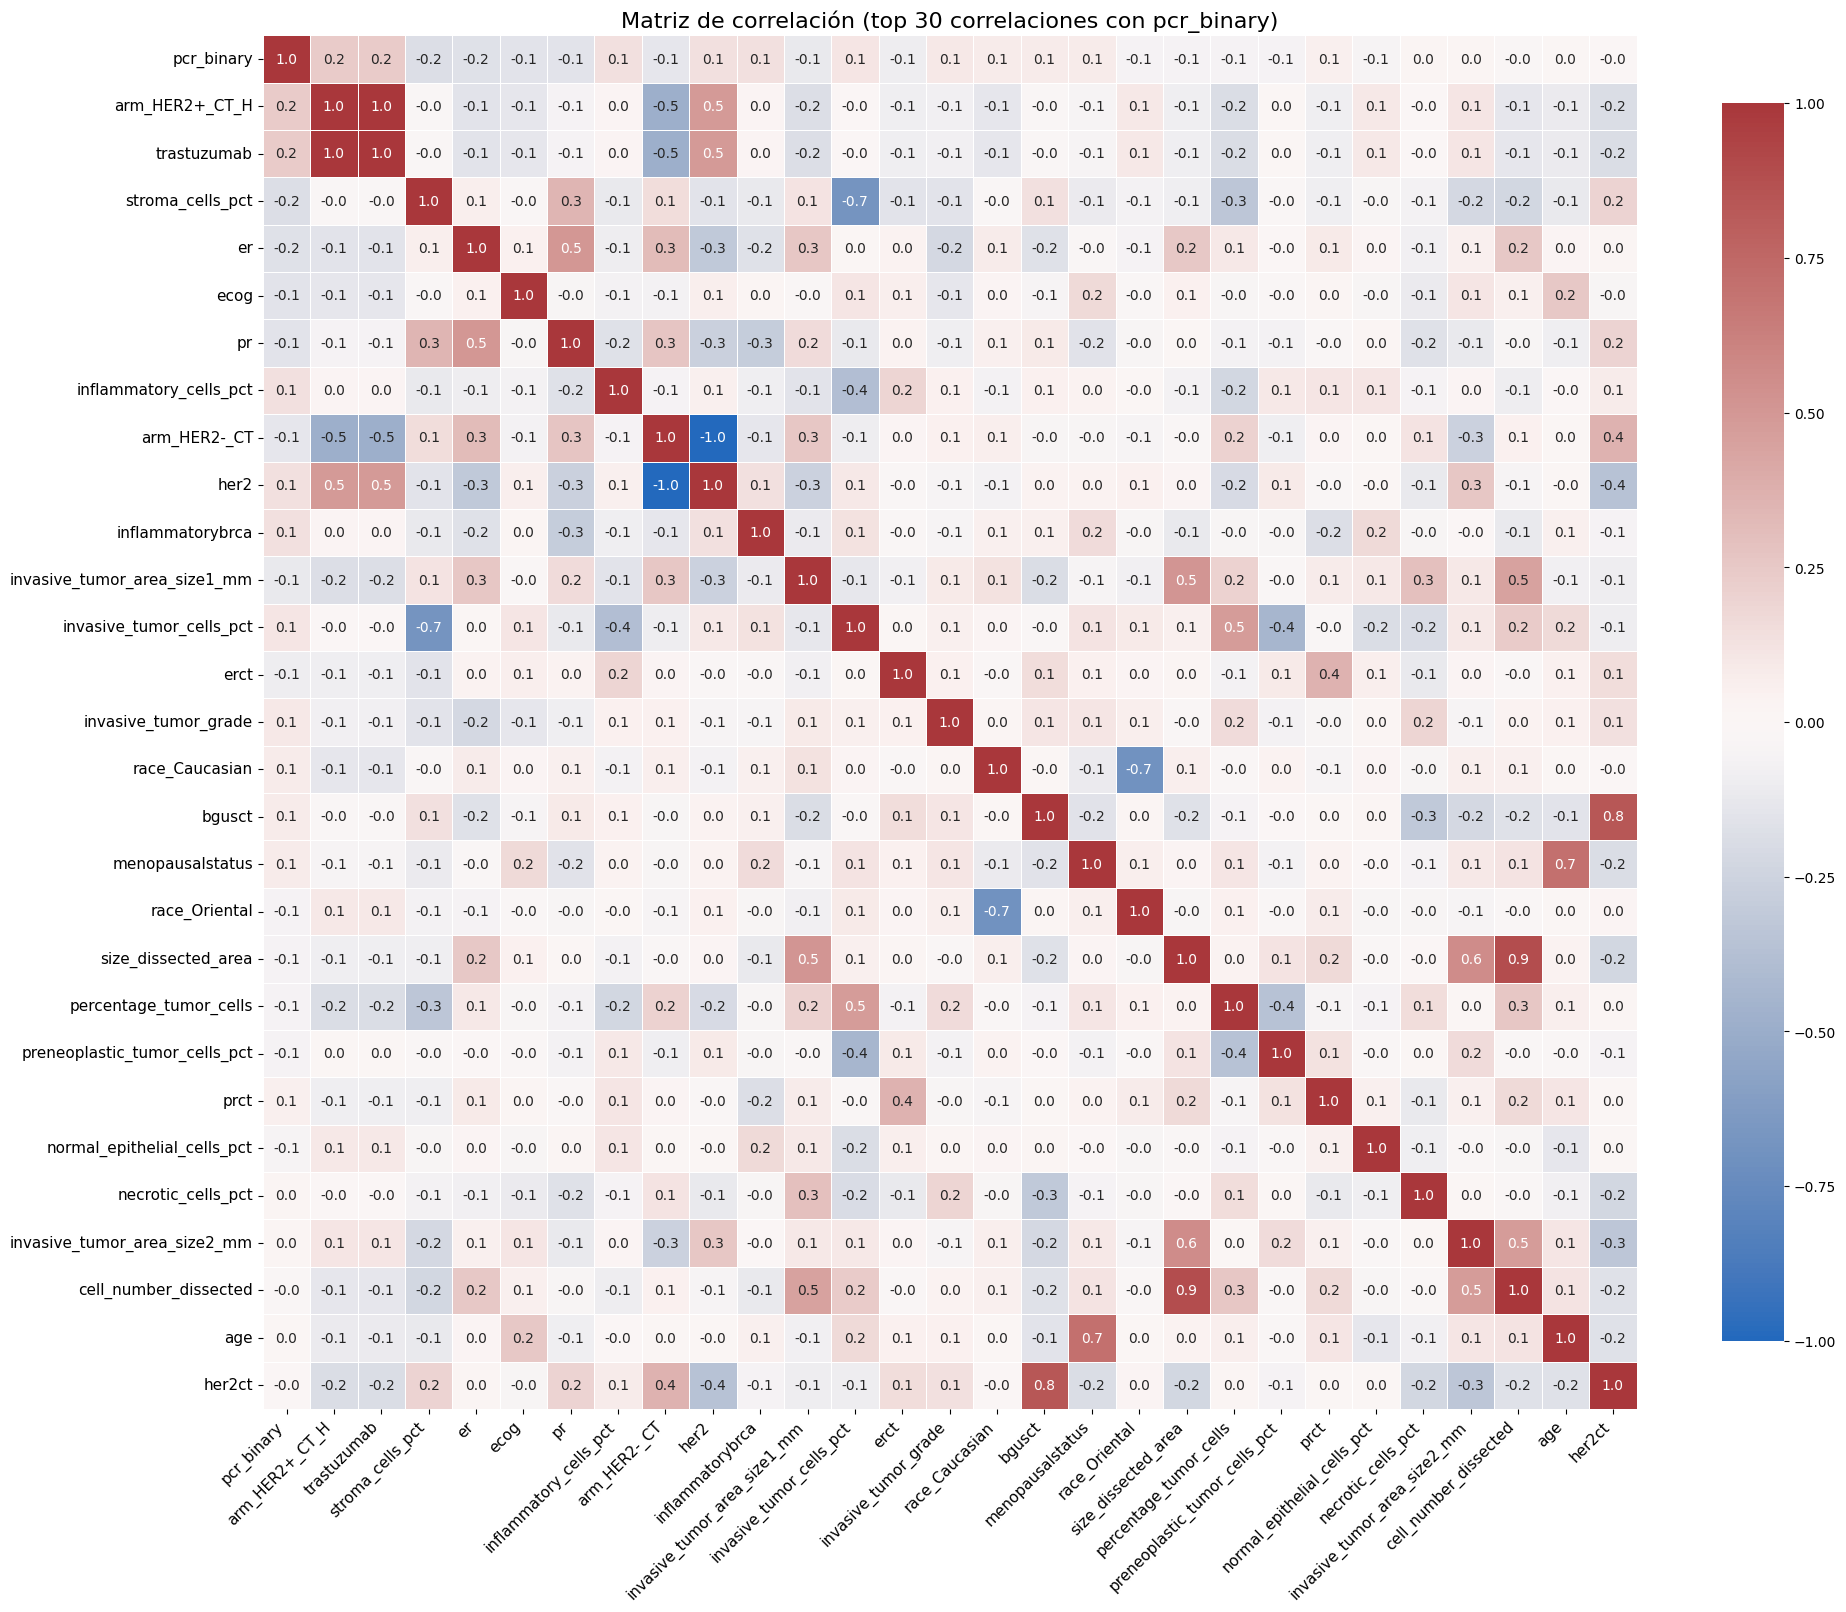

In [ ]:
# matriz de correlación (Pearson) top 30 correlaciones con pcr_binary

# unir variables clínicas categóricas + continuas
corr_vars = num_cols + cat_cols
corr_df = exploracion_df[corr_vars].copy()

# calcular matriz completa
full_corr_matrix = corr_df.corr(method="pearson").round(2)

# seleccionar top 30 variables más correlacionadas con 'pcr_binary' (en valor absoluto)
top_vars = full_corr_matrix["pcr_binary"].abs().sort_values(ascending=False).head(30).index.tolist()

# asegurar que pcr_binary está incluida
if "pcr_binary" not in top_vars:
    top_vars = ["pcr_binary"] + top_vars[:-1]

# calcular matriz solo para esas variables
corr_matrix = corr_df[top_vars].corr(method="pearson").round(2)

# heatmap
num_vars = len(corr_matrix.columns)
plt.figure(figsize=(max(20, 0.6 * num_vars), max(18, 0.6 * num_vars)))

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".1f",
    cmap="vlag",
    center=0,
    linewidths=0.5,
    square=True,
    annot_kws={"size": 10},
    cbar_kws={"shrink": 0.75}
)

plt.xticks(rotation=45, ha="right", fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.title("Matriz de correlación (top 30 correlaciones con pcr_binary)", fontsize=16)
plt.tight_layout()

# guardar imagen
correlation_path = os.path.join(output_dir, "matriz_correlacion_top30.png")
plt.savefig(correlation_path, dpi=300)
plt.show()
plt.close()


### Eliminación de variables clínicas no relevantes

Se han eliminado ciertas variables clínicas del conjunto de datos por los siguientes motivos:

- `percentage_tumor_cells`, `invasive_tumor_cells_pct`, `preneoplastic_tumor_cells_pct`: presentan baja variabilidad o baja correlación con la variable objetivo `pcr_binary`, sin un aporte predictivo claro.

- `race_Caucasian`, `race_Oriental`: no se observaron diferencias significativas entre grupos raciales en relación con la respuesta patológica completa. Además, estas variables pueden introducir ruido o sesgos si no aportan valor predictivo. Como podemos ver en la exploracion anterior, podemos ver que son poco relevantes y por tanto no las necesitamos. 

- `arm_HER2-_CT`: representa el grupo control HER2-, poco informativo para modelos centrados en pacientes HER2+ o tratamiento con trastuzumab.

- `her2`, `her2ct`, `prct`: son redundantes con otras variables que ya capturan la misma señal biológica de forma más limpia (`trastuzumab`, `pr`).

estas decisiones ayudan a reducir la dimensionalidad del conjunto de datos, eliminar redundancias y centrarse en las variables más relevantes desde un punto de vista clínico y estadístico.

In [7]:
# eliminar variables clínicas descartadas por redundancia o bajo valor predictivo
columnas_a_eliminar = [
    'percentage_tumor_cells',
    'invasive_tumor_cells_pct',
    'preneoplastic_tumor_cells_pct',
    'race_Caucasian', 'race_Oriental',
    'arm_HER2-_CT',
    'her2', 'her2ct',
    'prct'
]

full_data = full_data.drop(columns=columnas_a_eliminar, errors='ignore')

In [8]:
full_data.to_csv("/Users/user/Desktop/breast_cancer_fr/data/datos_modelling.csv", index=False)

# Variables Genéticas
Seleccionaremos las variables geneticas en el notebook de modelling dentro de la pipeline.

# Mapping de genes

In [10]:
logging.getLogger("GEOparse").setLevel(logging.ERROR)

# cargar plataforma GPL570 y su tabla de anotación
gse = GEOparse.get_GEO("GSE50948", destdir=".")
platform = gse.gpls["GPL570"]
annotation_table = platform.table

# extraer nombres de las columnas genéticas seleccionadas (300 genes) ---
gene_cols_finales = [col for col in full_data.columns if col.endswith("_at")]

# buscar en la tabla de anotación
genes_anotados = annotation_table[annotation_table["ID"].isin(gene_cols_finales)][
    ["ID", "Gene Symbol", "Gene Title"]
].sort_values("ID")

display(genes_anotados)

# guardamos la tabla de anotación
genes_anotados.to_csv("/Users/user/Desktop/breast_cancer_fr/data/genes_anotados.csv", index=False)

/Users/user/Desktop/breast_cancer_fr/venv/lib/python3.13/site-packages/GEOparse/GEOparse.py:401: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  return read_csv(StringIO(data), index_col=None, sep="\t")


,ID,Gene Symbol,Gene Title
0,1007_s_at,DDR1 /// MIR4640,discoidin domain receptor tyrosine kinase 1 //...
1,1053_at,RFC2,"replication factor C (activator 1) 2, 40kDa"
2,117_at,HSPA6,heat shock 70kDa protein 6 (HSP70B')
3,121_at,PAX8,paired box 8
4,1255_g_at,GUCA1A,guanylate cyclase activator 1A (retina)
...,...,...,...
54664,AFFX-r2-Ec-bioC-5_at,NaN,NaN
54665,AFFX-r2-Ec-bioD-3_at,NaN,NaN
54666,AFFX-r2-Ec-bioD-5_at,NaN,NaN
54667,AFFX-r2-P1-cre-3_at,NaN,NaN
